<a href="https://colab.research.google.com/github/Rohith18744/CIFAR-10-Image-Dataset-CNN/blob/main/CIFAR_10_Image_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

[9]


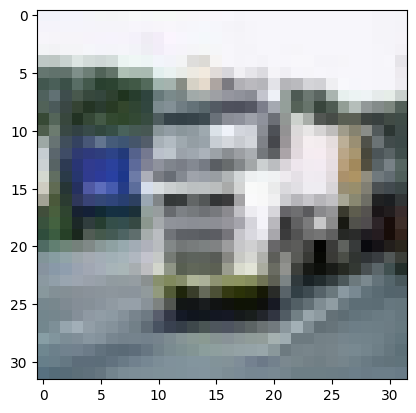

In [6]:
#Visualization
i=1000
plt.imshow(X_train[i])
print(y_train[i])

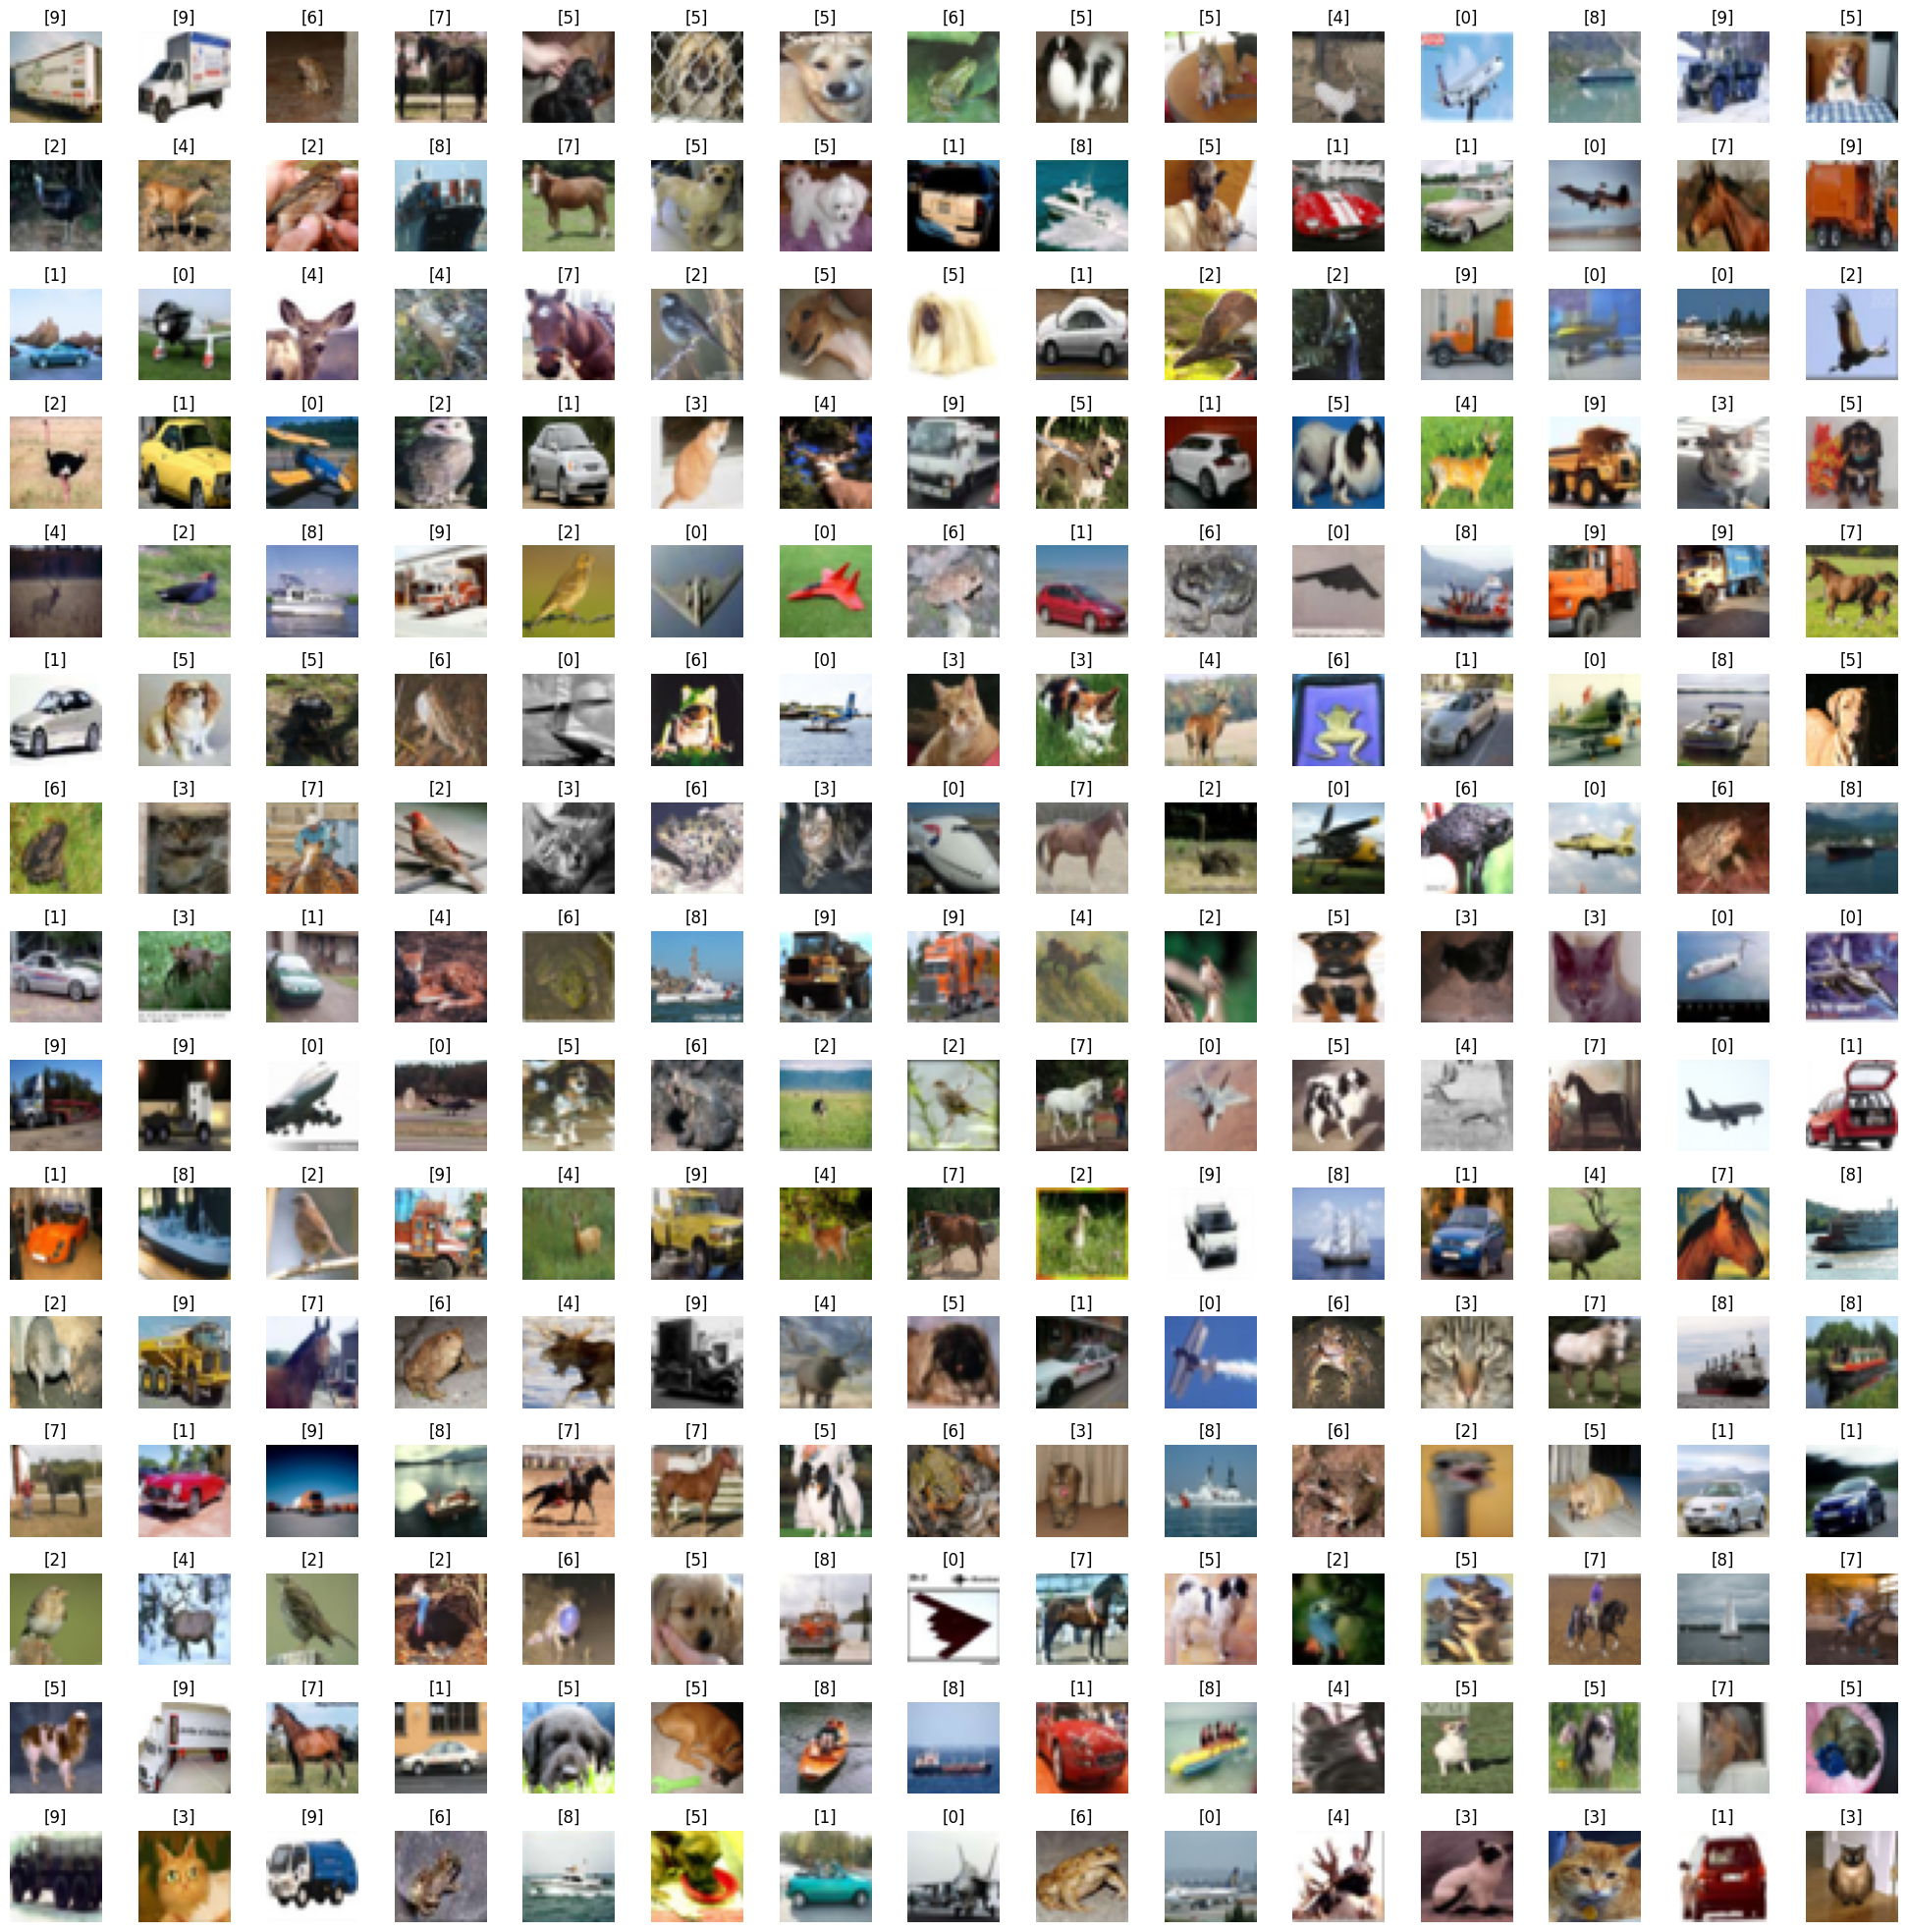

In [7]:
W_grid=15
L_grid=15
fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)

for i in np.arange(0,L_grid*W_grid):
  index=np.random.randint(n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [8]:
#Data Preperation
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')


In [9]:
number_cat=10

In [10]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
import keras
y_train=keras.utils.to_categorical(y_train,number_cat)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
import keras
y_test=keras.utils.to_categorical(y_test,number_cat)

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [15]:
X_train=X_train/255
X_test=X_test/255

In [16]:

X_train
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape=X_train.shape[1:]

In [19]:
Input_shape

(32, 32, 3)

In [20]:
#Training the model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import RMSprop

In [21]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model=Sequential()
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=512,activation='relu'))
cnn_model.add(Dense(units=512,activation='relu'))
cnn_model.add(Dense(units=10,activation='softmax'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [23]:
history=cnn_model.fit(X_train,y_train,batch_size=32,epochs=2,shuffle=True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1082s 690ms/step - accuracy: 0.3631 - loss: 1.7955
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1103s 691ms/step - accuracy: 0.6256 - loss: 1.0815


In [24]:
evaluation=cnn_model.evaluate(X_test,y_test)
print("Test Accuracy:{}".format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.6611 - loss: 1.0162
Test Accuracy:0.6579999923706055


In [25]:
import numpy as np
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step


array([6, 8, 8, ..., 5, 1, 7])

In [26]:
y_test=y_test.argmax(1)

In [27]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

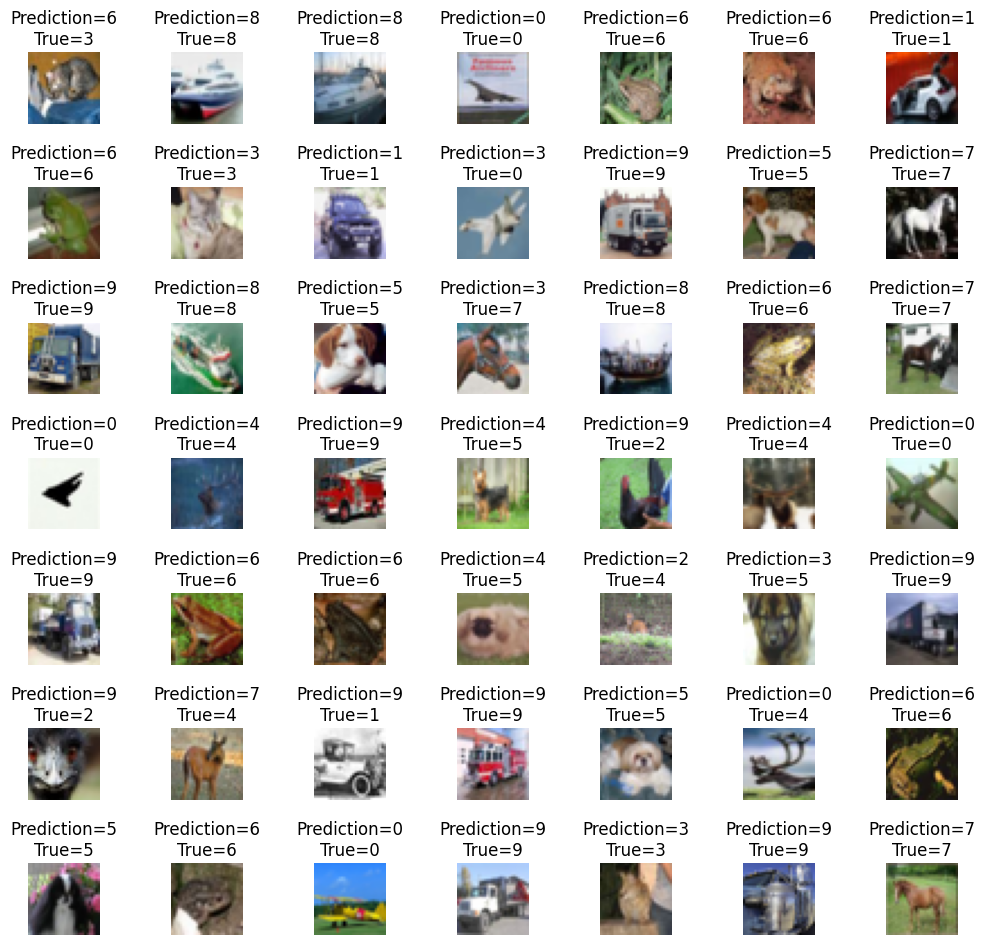

In [28]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  title_str = "Prediction={}\nTrue={}".format(predicted_classes[i],y_test[i]) # format the string first
  axes[i].set_title(title_str) # then set the title
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

<Axes: >

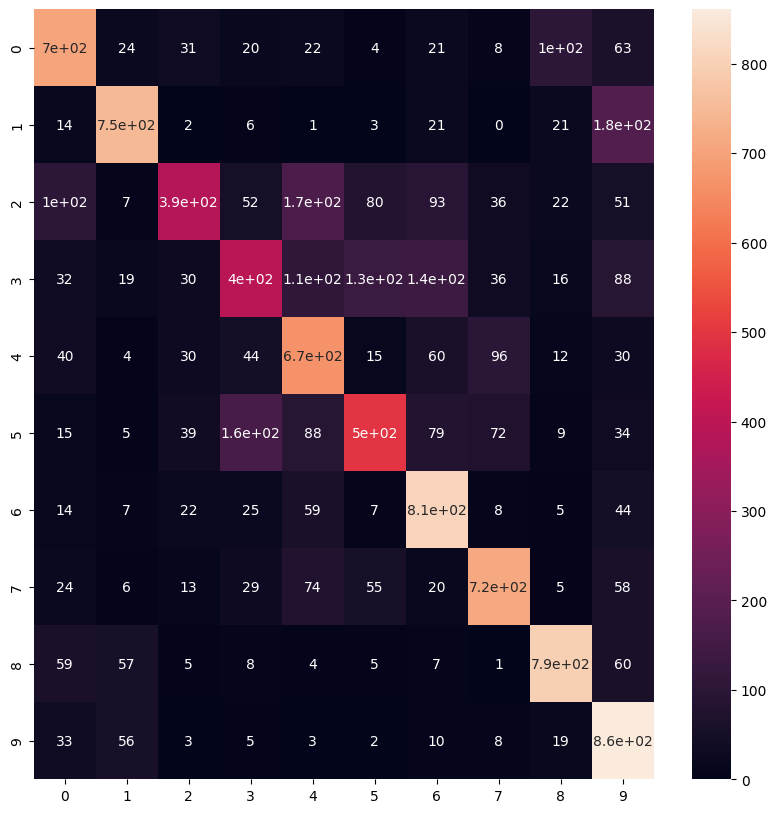

In [32]:
#Confusion matrix:summarize our results at one place.
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)